In [1]:
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.join(dirPath, 'packages')

if not packagesPath in sys.path:
    sys.path.append(packagesPath)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2

train = True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import packages.dataset as dataset

datasetPath = os.path.join(dirPath, 'datasets')
dataProcessor = dataset.Brexit(datasetPath)
dataProcessor.loadFilePaths()

Dataset path:
/notebooks/Papers/paper2/datasets/brexit
Total files 48
-------------------------------
Training file count:  38
Total files in list:  38
-------------------------------
Total validation file count 4
Total files in list:  4
-------------------------------
Total test file count 6
Total files in list:  6
-------------------------------


In [3]:
from packages.gc.vocab import Vocab
vocabProcessor = Vocab(dataProcessor)
if train:
    vocabProcessor.buildVocab()

----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  259
Filtered local vocab:  4
----------------------
Total local vocab:  259
Filtered local vocab:  4
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  194
Filtered local vocab:  5
----------------------
Total local vocab:  194
Filtered local vocab:

In [4]:
from packages.gc.lda import LDA

ldaProcessor = LDA(dataProcessor)

if train:
    ldaProcessor.setNumberOfIterations(500)
    ldaProcessor.setPerplexity(10)
    ldaProcessor.setNumberOfTopics(10)
    ldaProcessor.buildWordCoOccurenceVectors()
    ldaProcessor.train()


Finished training LDA


In [5]:
from packages.gc.tsne import TSNE
tsneProcessor = TSNE(dataProcessor)

# TSNE is trained with word co-occurence matrix
if train:
    tsneProcessor.setNumberOfIterations(500)
    tsneProcessor.setPerplexity(10)
    tsneProcessor.setNumberOfTopics(10)
    tsneProcessor.train()


Trained for TSNE


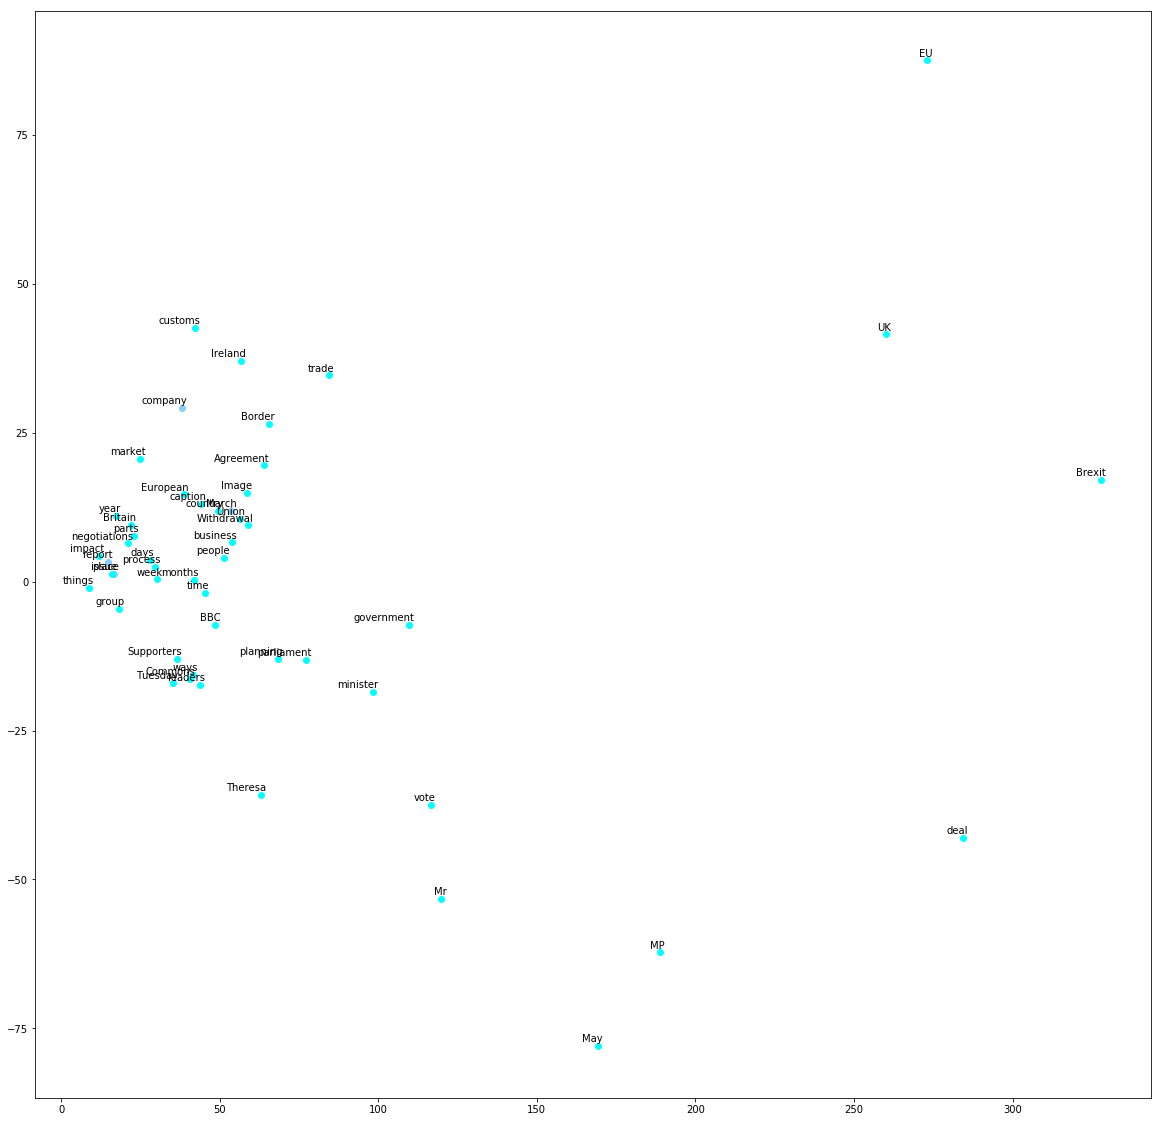

In [6]:
from packages.gc.plotter import Plotter

# Display TSNE word co-occurance trained points (all topic)

tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


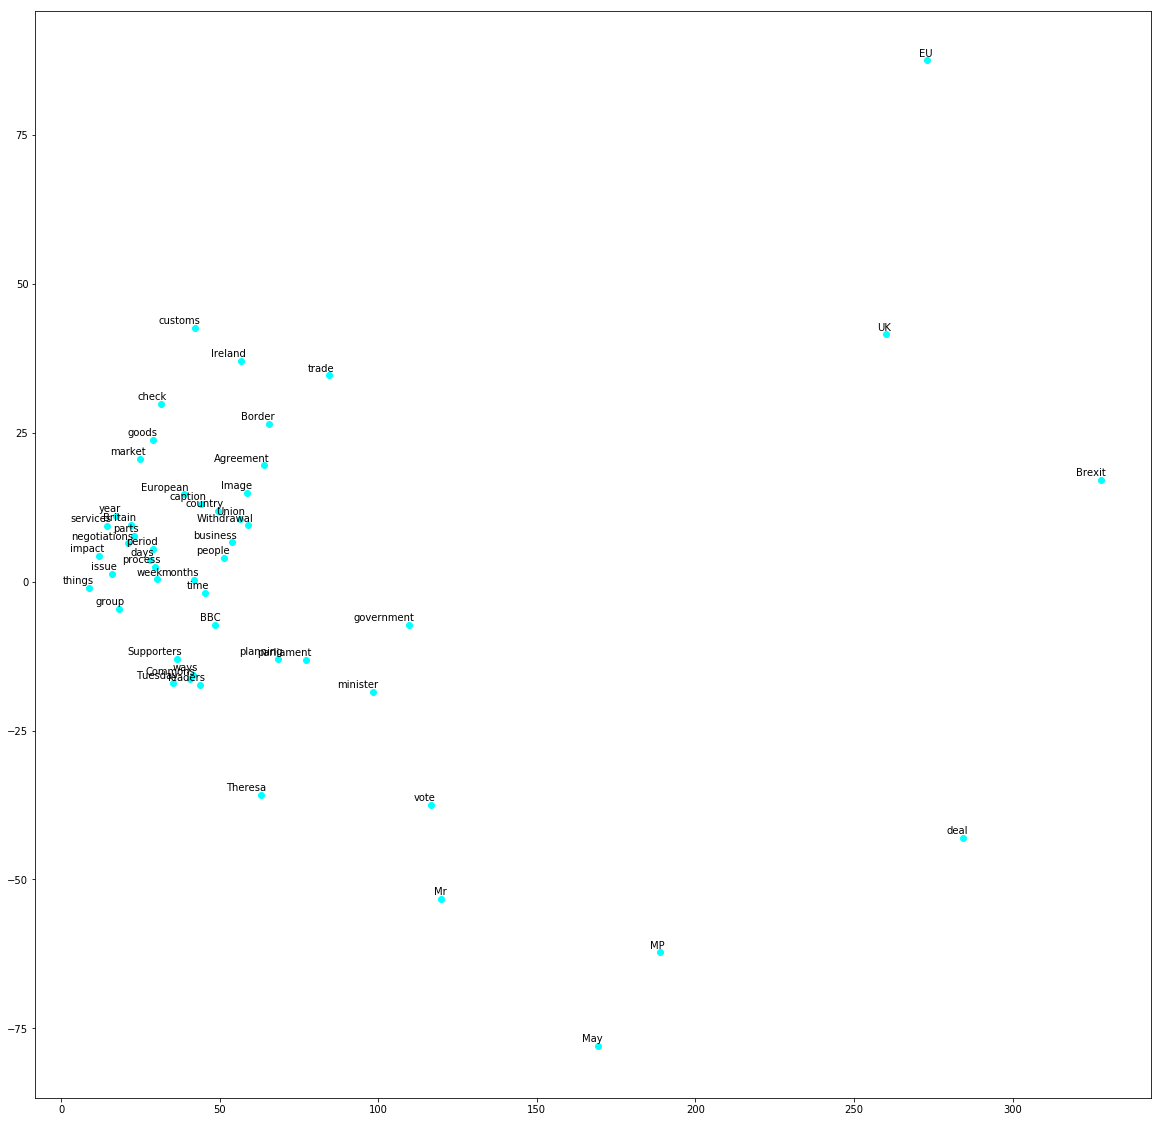

In [7]:
# Display TSNE word co-occurance trained points (all topic)

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


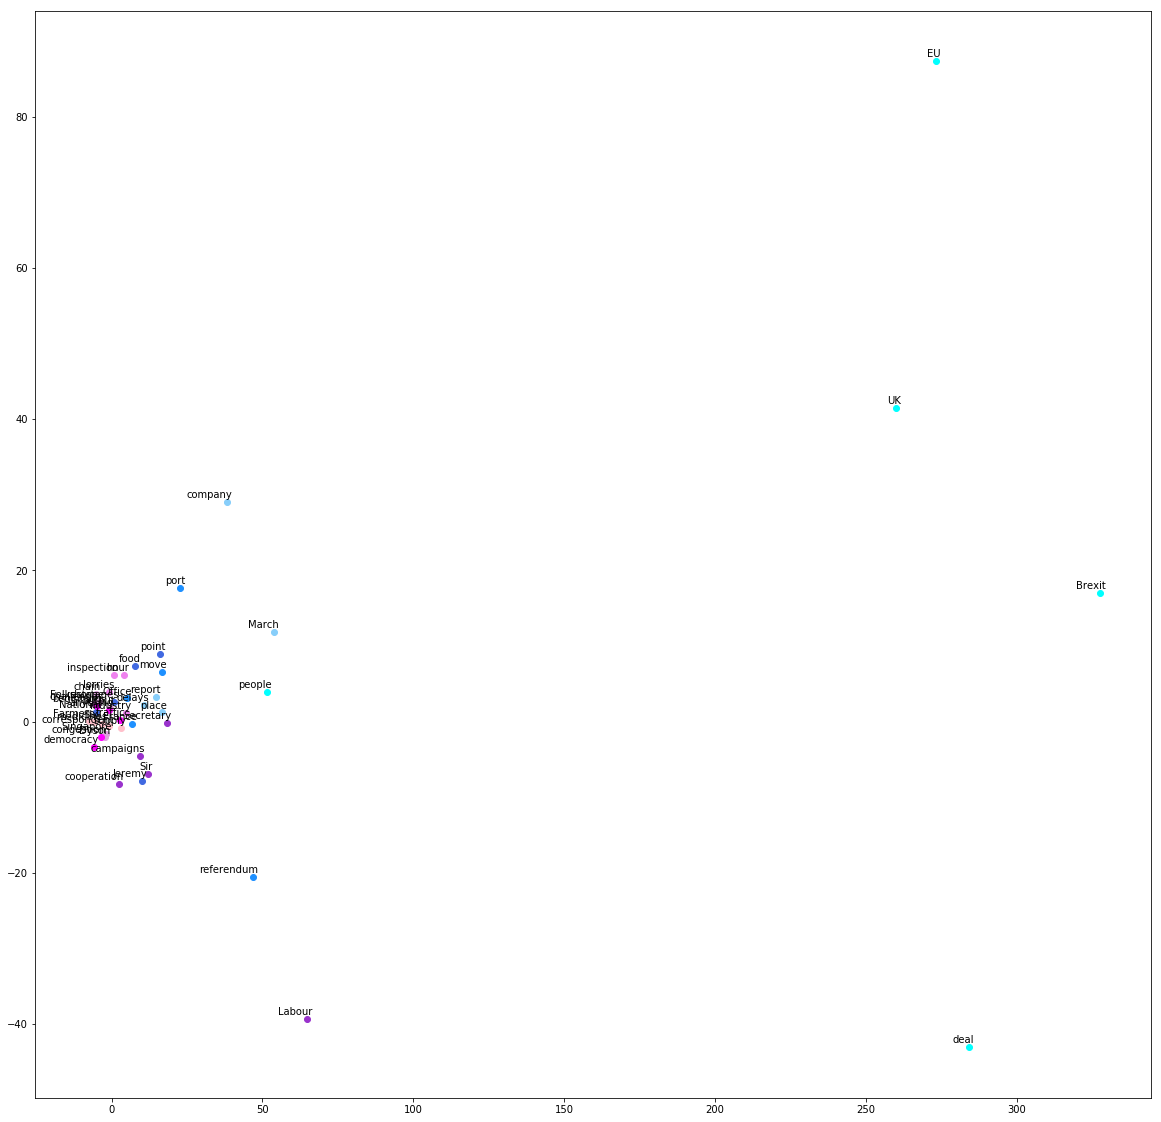

In [8]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 5

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(8)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(7)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(6)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(5)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(4)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(3)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(2)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(1)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()



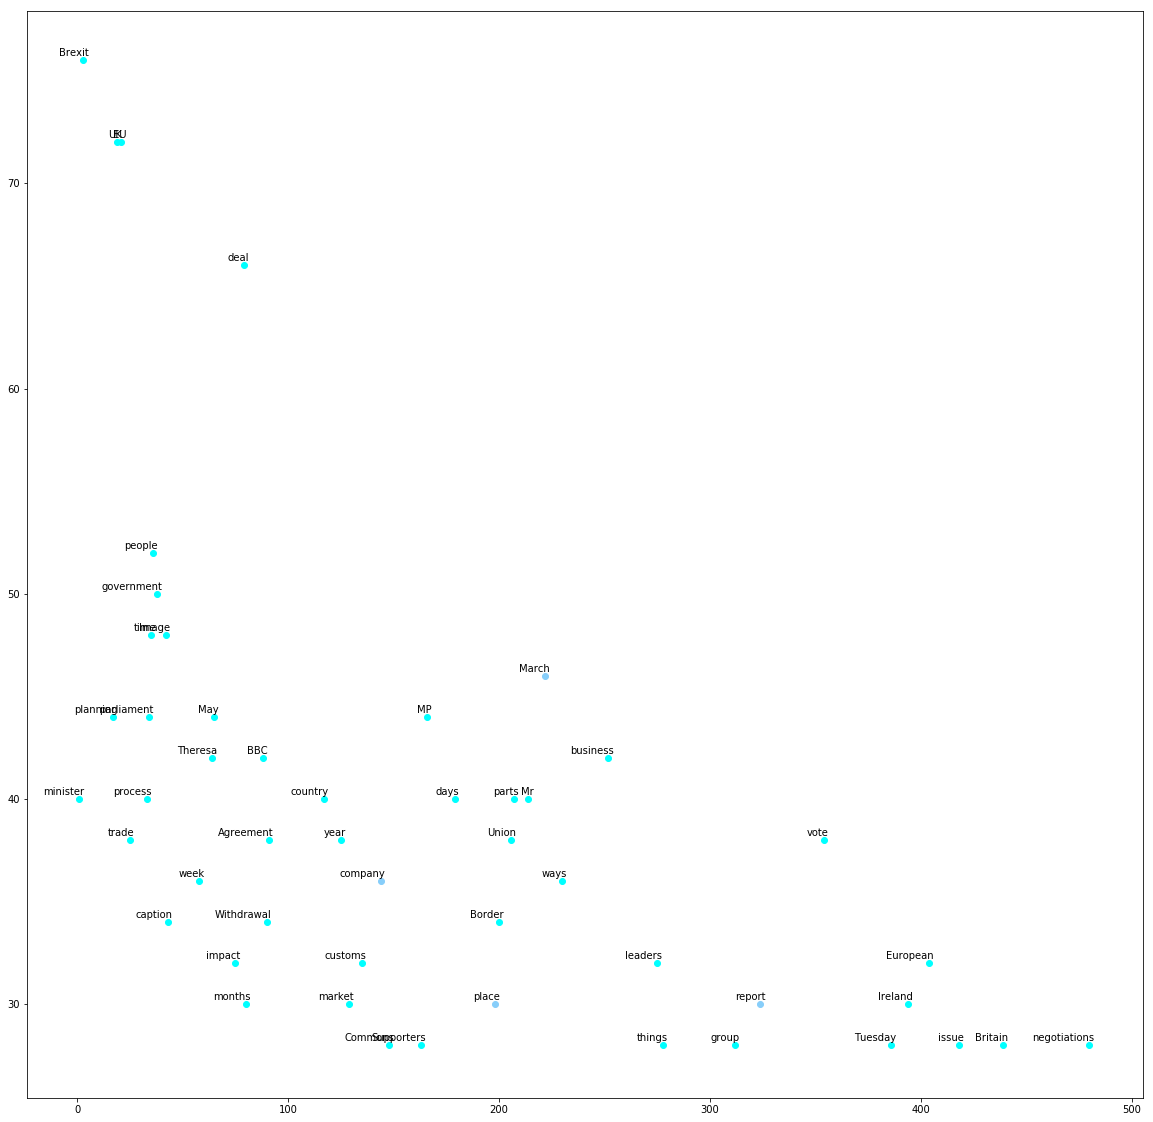

In [9]:
from packages.gc.linear import Linear
linearProcessor = Linear(dataProcessor)

# Display top 50 points (all topics)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

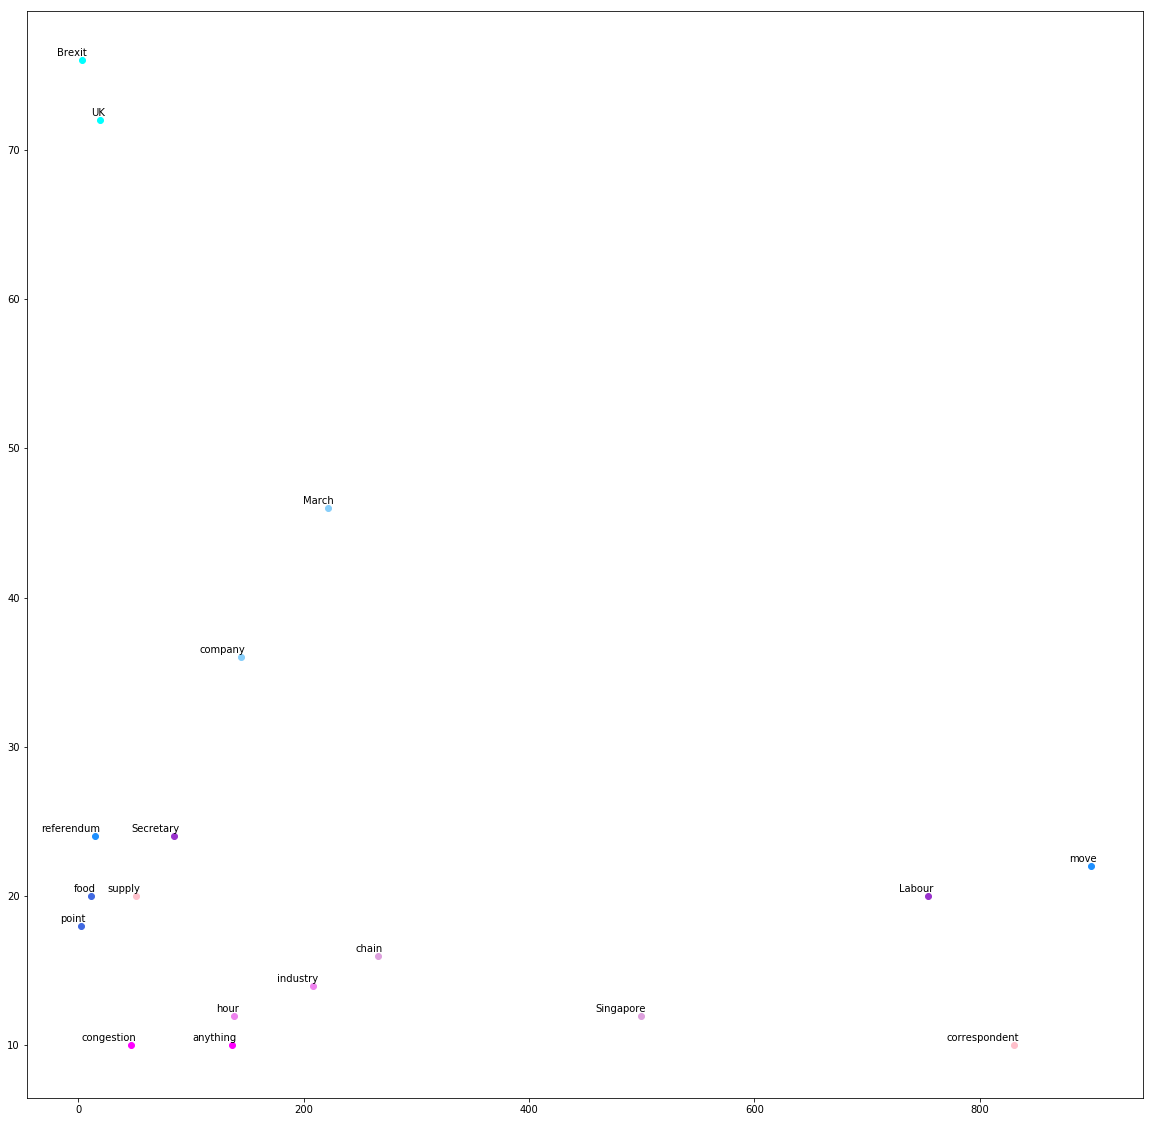

In [10]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 2

linearProcessor.setTopicFilter(9)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(8)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(7)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(6)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(5)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(4)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(3)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(2)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(1)
wordInfo += linearProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

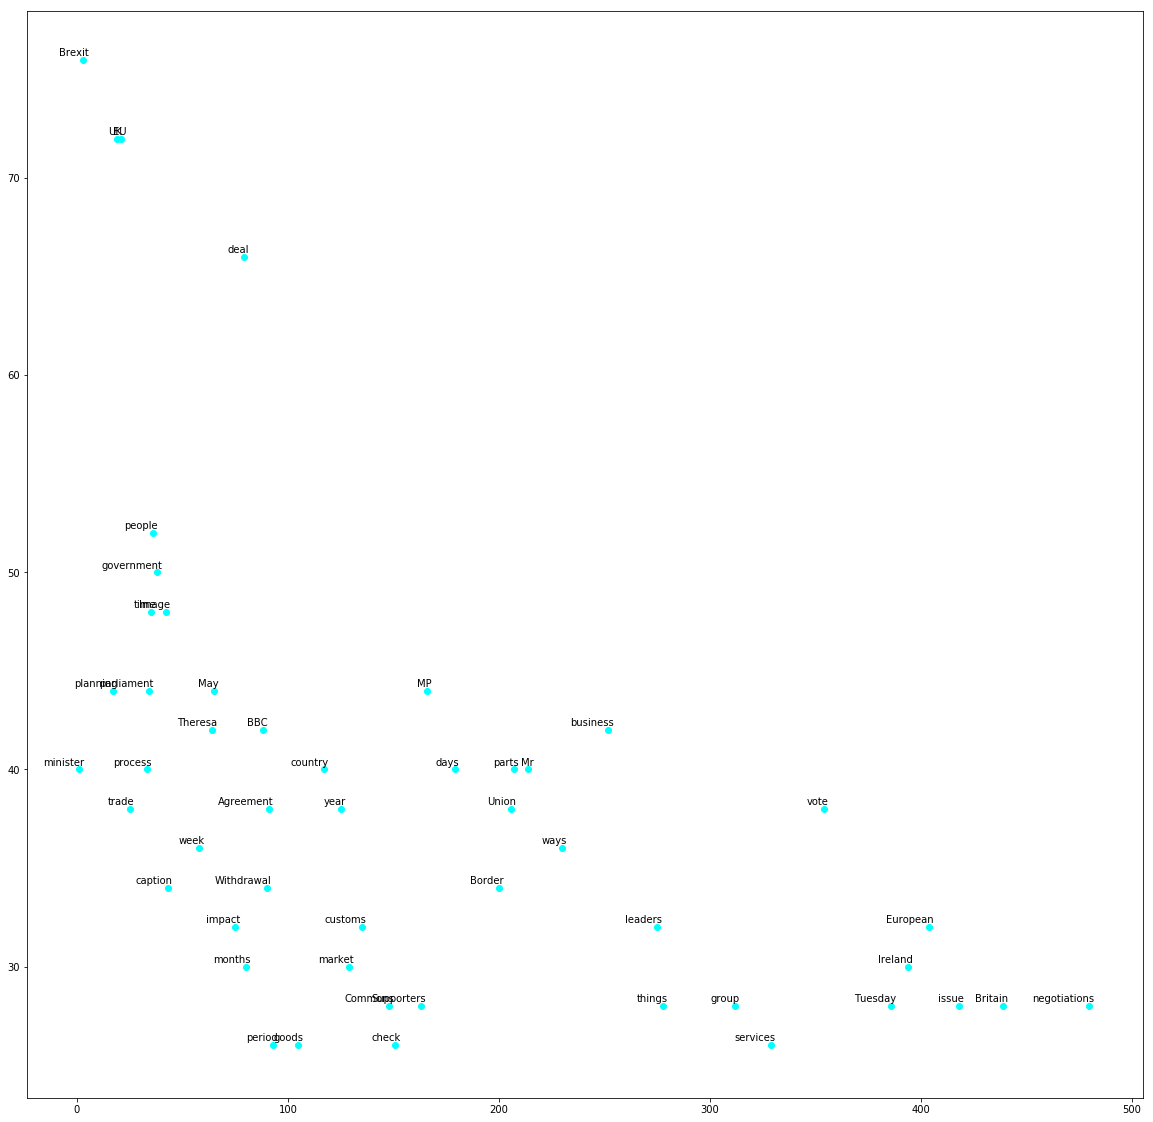

In [11]:
# Display top 50 points (top topic)
linearProcessor.setTopicFilter(9)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

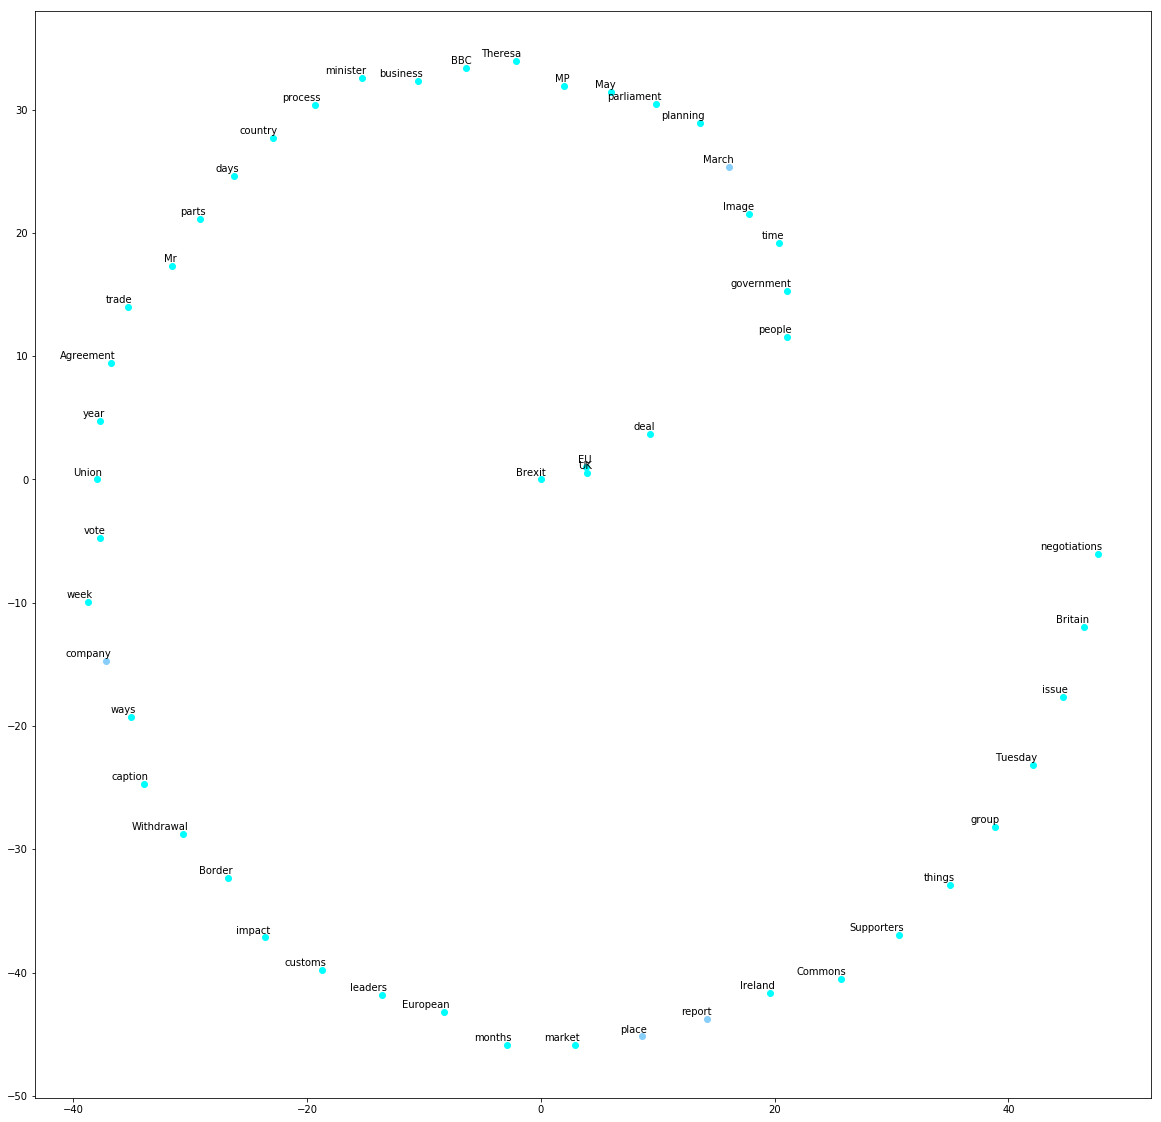

In [12]:

from packages.gc.peripheral import Peripheral
peripheralProcessor = Peripheral(dataProcessor)


# Display top 50 points (all topics)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()


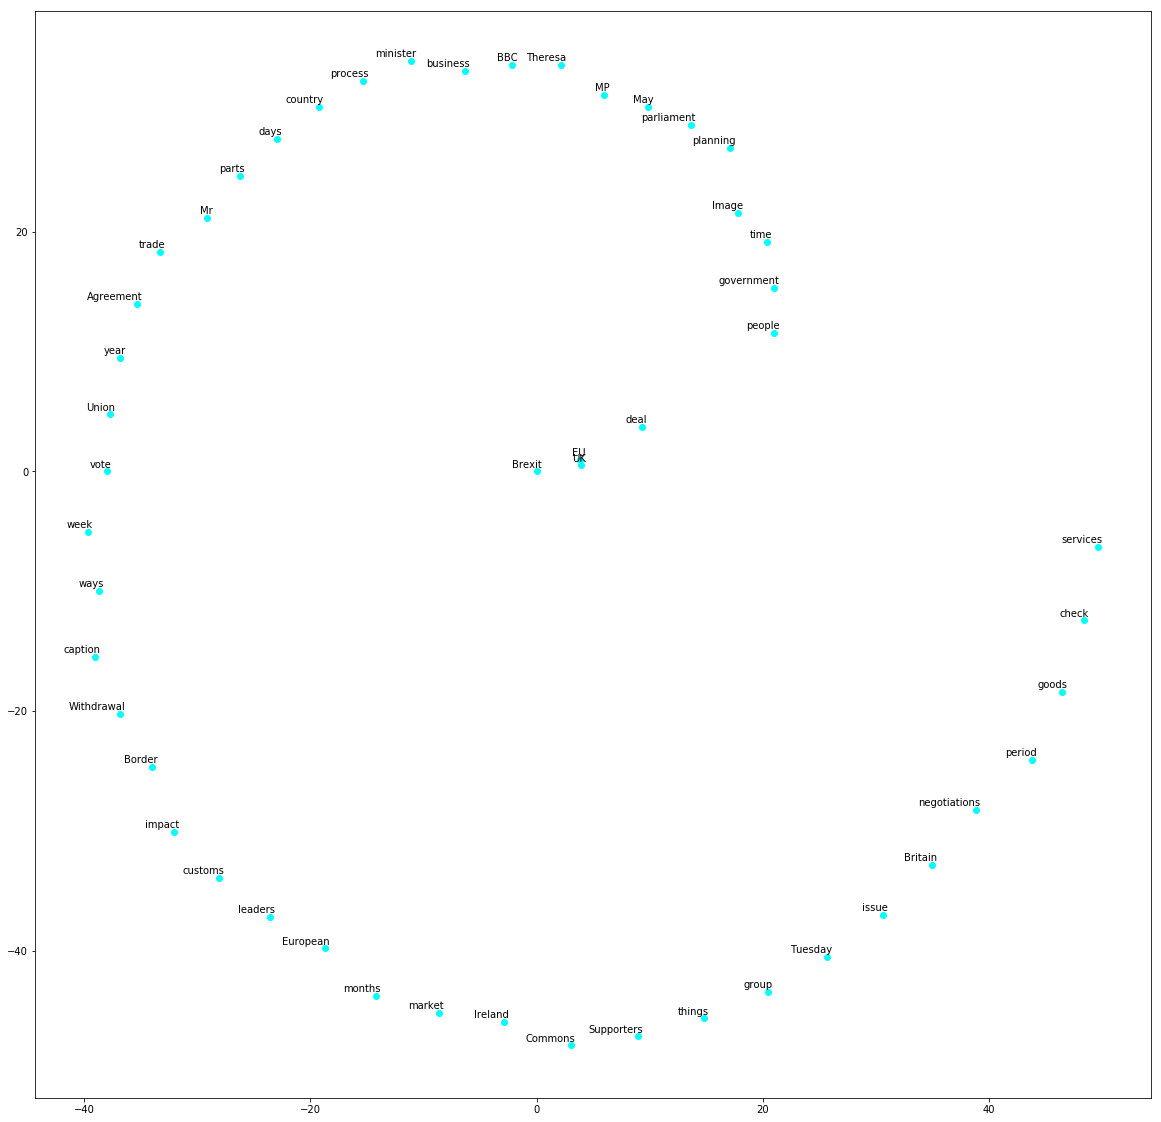

In [13]:
# Display top 50 points (top topic)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTopicFilter(9)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

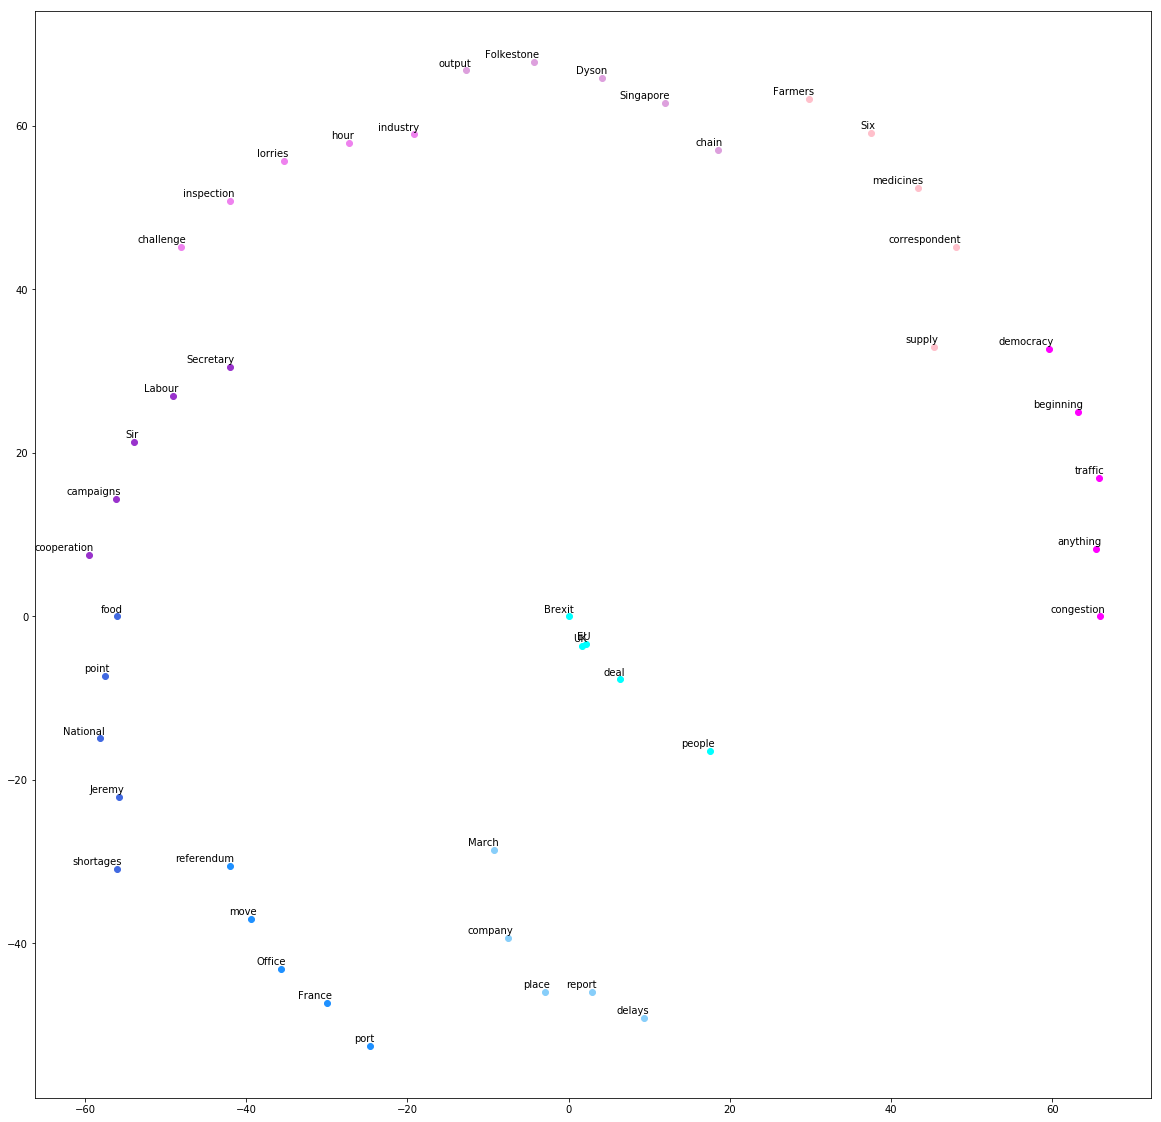

In [14]:

# All topics
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTotalAngle(360 / 10)

numberOfWords = 5
peripheralProcessor.setTopicFilter(1)
wordInfo = peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(2)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(3)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(4)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(5)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(6)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(7)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(8)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(9)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()



In [15]:
from packages.gc.word2vec import Word2Vec
word2vecProcessor = Word2Vec(dataProcessor)

if train:
    word2vecProcessor.setNumberOfIterations(500)
    word2vecProcessor.setPerplexity(10)
    word2vecProcessor.setNumberOfTopics(10)
    skipWindow = 2
    word2vecProcessor.resetIndex()
    word2vecProcessor.setSkipWindow(skipWindow)
    word2vecProcessor.setBatchSize(128)
    word2vecProcessor.train()



Instructions for updating:
Colocations handled automatically by placer.
Batches:  14
Instructions for updating:
Use tf.cast instead.
--------------------------

Average loss after epoch  0 :  12.877755301339286

Average loss after epoch  0 :  11.914531785614637

Average loss after epoch  0 :  11.917963033514884

Average loss after epoch  0 :  10.71759101362439

Average loss after epoch  0 :  10.192960515342591

Average loss after epoch  0 :  10.450448020208622

Average loss after epoch  0 :  11.22917672451825

Average loss after epoch  0 :  10.346225548682108

Average loss after epoch  0 :  10.462001514498498

Average loss after epoch  0 :  11.7876474993615

Average loss after epoch  0 :  10.519214375651938

Average loss after epoch  0 :  9.685276830752482

Average loss after epoch  0 :  11.194112834799842

Average loss after epoch  0 :  10.902064055024766
Similar to laws: team, reception, comedy, certainty, event,
Similar to Image: crisis, South, Netherlands, lorries, park,
Similar to


Average loss after epoch  6 :  5.181141997622257

Average loss after epoch  6 :  3.759244997249246

Average loss after epoch  6 :  4.457946374228043

Average loss after epoch  6 :  4.114131081261127

Average loss after epoch  6 :  3.7770262522468885

Average loss after epoch  6 :  4.159505781410492

Average loss after epoch  6 :  3.628874501790203

Average loss after epoch  6 :  4.02900823249743
Similar to laws: team, event, comedy, reception, efforts,
Similar to Image: crisis, South, lorries, Netherlands, Brexit,
Similar to immigration: chatter, Trump, shelflife, love, Disaster,
Similar to consequence: blame, ProBrexit, 40000, services, love,
Similar to news: goods, Theyre, transport, trade, sites,
Similar to Earlier: yours, Birmingham, September, calculations, database,
Similar to Organisation: Suddeutsche, chain, summit, Could, point,
Similar to products: Agreement, transport, Bellis, Baxter, prices,
--------------------------

Average loss after epoch  7 :  3.205389840262277

Aver


Average loss after epoch  13 :  1.2709974949413374

Average loss after epoch  13 :  2.201352219530896

Average loss after epoch  13 :  1.7681551732299552

Average loss after epoch  13 :  2.453224255624824

Average loss after epoch  13 :  1.5376265442075767

Average loss after epoch  13 :  2.6740040296295033
Similar to laws: event, team, comedy, reception, efforts,
Similar to Image: crisis, lorries, Netherlands, South, Brexit,
Similar to immigration: chatter, Trump, love, Disaster, shelflife,
Similar to consequence: ProBrexit, services, blame, democracy, love,
Similar to news: goods, trade, transport, documents, Theyre,
Similar to Earlier: yours, September, Birmingham, database, calculations,
Similar to Organisation: Suddeutsche, port, chain, point, Could,
Similar to products: Agreement, transport, Baxter, prices, Car,
--------------------------

Average loss after epoch  14 :  1.155709675380162

Average loss after epoch  14 :  2.5467489398255636

Average loss after epoch  14 :  1.3915


Average loss after epoch  20 :  0.9544060266499518

Average loss after epoch  20 :  0.578601581968614

Average loss after epoch  20 :  0.6974466005335074

Average loss after epoch  20 :  0.7822907152585318

Average loss after epoch  20 :  0.7557555109462009

Average loss after epoch  20 :  0.8105587339841246

Average loss after epoch  20 :  1.2133969194579899

Average loss after epoch  20 :  0.7304400640363408

Average loss after epoch  20 :  1.380163051100252

Average loss after epoch  20 :  1.0367039851781639

Average loss after epoch  20 :  1.162954529214735
Similar to laws: event, team, comedy, reception, efforts,
Similar to Image: crisis, Netherlands, lorries, South, models,
Similar to immigration: Trump, chatter, Disaster, risk, love,
Similar to consequence: ProBrexit, services, democracy, blame, providers,
Similar to news: goods, transport, trade, documents, terminal,
Similar to Earlier: yours, September, Birmingham, reduction, Welt,
Similar to Organisation: Suddeutsche, chain,


Average loss after epoch  27 :  0.8344698931991269

Average loss after epoch  27 :  0.2962213654335

Average loss after epoch  27 :  0.29768658464164716

Average loss after epoch  27 :  0.5726847654190881

Average loss after epoch  27 :  0.43150891580473255

Average loss after epoch  27 :  0.2992992839063143

Average loss after epoch  27 :  0.46269205951154896
Similar to laws: event, team, comedy, reception, efforts,
Similar to Image: Netherlands, crisis, lorries, South, models,
Similar to immigration: Trump, Disaster, chatter, risk, love,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, trade, documents, terminal,
Similar to Earlier: yours, reduction, September, Welt, Birmingham,
Similar to Organisation: Suddeutsche, chain, point, Could, port,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss after epoch  28 :  0.787334782736642

Average loss after epoch  28 :  0.4


Average loss after epoch  35 :  0.3427566769891657

Average loss after epoch  35 :  0.6041014824819967

Average loss after epoch  35 :  0.2713535387921362

Average loss after epoch  35 :  0.2407348025384973

Average loss after epoch  35 :  0.47802494160152215

Average loss after epoch  35 :  0.30585651609998143

Average loss after epoch  35 :  0.2416569881593196

Average loss after epoch  35 :  0.25918076501683823

Average loss after epoch  35 :  0.3008847563510824

Average loss after epoch  35 :  0.2520834230883185

Average loss after epoch  35 :  0.2993678452252154
Similar to laws: event, team, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, models,
Similar to immigration: Trump, Disaster, risk, chatter, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, documents, trade, situation,
Similar to Earlier: yours, reduction, Welt, September, changes,
Similar to Organisation: Sudde


Average loss after epoch  41 :  0.1949022189257433

Average loss after epoch  41 :  0.22466557632938658
Similar to laws: event, team, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, documents, situation, terminal,
Similar to Earlier: yours, reduction, Welt, September, changes,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss after epoch  42 :  0.25421098300388884

Average loss after epoch  42 :  0.22180496186626203

Average loss after epoch  42 :  0.24750347544083443

Average loss after epoch  42 :  0.2326383048646006

Average loss after epoch  42 :  0.22870713936681092

Average loss after epoch  42 :  0.19644020743837992

Average loss a


Average loss after epoch  48 :  0.1662170117887831

Average loss after epoch  48 :  0.23366869649569885

Average loss after epoch  48 :  0.17212752867403533

Average loss after epoch  48 :  0.15502816748666118

Average loss after epoch  48 :  0.2480604863678042

Average loss after epoch  48 :  0.2181421022792276

Average loss after epoch  48 :  0.1813557538331947

Average loss after epoch  48 :  0.1671657419839175
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, documents, situation, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss afte

Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss after epoch  55 :  0.2305804831641061

Average loss after epoch  55 :  0.2063851465984267

Average loss after epoch  55 :  0.19924284808837292

Average loss after epoch  55 :  0.22969990244437039

Average loss after epoch  55 :  0.1439241548882558

Average loss after epoch  55 :  0.1825559081102172

Average loss after epoch  55 :  0.16957196126001758

Average loss after epoch  55 :  0.202652017651298

Average loss after epoch  55 :  0.1469997196238877

Average loss after epoch


Average loss after epoch  61 :  0.15669666522548067

Average loss after epoch  61 :  0.16949894512963115

Average loss after epoch  61 :  0.16575225938308227

Average loss after epoch  61 :  0.1499649774098311

Average loss after epoch  61 :  0.15294111123442589

Average loss after epoch  61 :  0.13828364465262205

Average loss after epoch  61 :  0.1719497551901182

Average loss after epoch  61 :  0.1411990871768838
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, requirement, centuries,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss af


Average loss after epoch  68 :  0.19849751459613832

Average loss after epoch  68 :  0.17156752381087442

Average loss after epoch  68 :  0.14572097320880287

Average loss after epoch  68 :  0.15828589134239426

Average loss after epoch  68 :  0.19631905465808885

Average loss after epoch  68 :  0.1576608214417294

Average loss after epoch  68 :  0.15749167398071853

Average loss after epoch  68 :  0.140089247195108

Average loss after epoch  68 :  0.17205718397868414

Average loss after epoch  68 :  0.150170524375618

Average loss after epoch  68 :  0.1290544753597592

Average loss after epoch  68 :  0.12905179947136708
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduct


Average loss after epoch  75 :  0.13243295003845917

Average loss after epoch  75 :  0.1738015762751121

Average loss after epoch  75 :  0.18395966541046768

Average loss after epoch  75 :  0.12010613101669355

Average loss after epoch  75 :  0.13152588479430066

Average loss after epoch  75 :  0.12425997503648953

Average loss after epoch  75 :  0.17461315411049042

Average loss after epoch  75 :  0.15761424219162543
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss 


Average loss after epoch  82 :  0.12079172379155442

Average loss after epoch  82 :  0.13443041205858863

Average loss after epoch  82 :  0.12939891670463743

Average loss after epoch  82 :  0.1813552106096051

Average loss after epoch  82 :  0.13546603722709774

Average loss after epoch  82 :  0.15347064804700045

Average loss after epoch  82 :  0.11691954396428596

Average loss after epoch  82 :  0.1274864181608401

Average loss after epoch  82 :  0.13852188916951733

Average loss after epoch  82 :  0.13979485909992054
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, Unionist,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Sim


Average loss after epoch  89 :  0.12356936098194116

Average loss after epoch  89 :  0.1340557245704787

Average loss after epoch  89 :  0.11105615687010727
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss after epoch  90 :  0.19597383907863072

Average loss after epoch  90 :  0.1788986386085043

Average loss after epoch  90 :  0.16442399834752428

Average loss after epoch  90 :  0.16709638040346783

Average loss after epoch  90 :  0.09676689789485568

Average loss


Average loss after epoch  96 :  0.1373072424713446

Average loss after epoch  96 :  0.14775554310128572

Average loss after epoch  96 :  0.11349248316376372

Average loss after epoch  96 :  0.12052662842790922

Average loss after epoch  96 :  0.12739599295550913

Average loss after epoch  96 :  0.12724138196599932

Average loss after epoch  96 :  0.13482033418494496

Average loss after epoch  96 :  0.13655157543852076

Average loss after epoch  96 :  0.1256204131512657

Average loss after epoch  96 :  0.1186850360693592

Average loss after epoch  96 :  0.12042316575605286

Average loss after epoch  96 :  0.13058875059780523
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, r


Average loss after epoch  102 :  0.14276517764771746

Average loss after epoch  102 :  0.12549190956641149
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss after epoch  103 :  0.19851899147033691

Average loss after epoch  103 :  0.15583208629063197

Average loss after epoch  103 :  0.13638593712631536

Average loss after epoch  103 :  0.1424414614546751

Average loss after epoch  103 :  0.10048028897464599

Average loss after epoch  103 :  0.15510862006404594

Ave


Average loss after epoch  109 :  0.1169679229325148

Average loss after epoch  109 :  0.11607248488541226

Average loss after epoch  109 :  0.14110019015661007

Average loss after epoch  109 :  0.12009728111496364

Average loss after epoch  109 :  0.12212805248276874
Similar to laws: team, event, reception, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, Baxter, prices, Review,
--------------------------

Average loss after epoch  110 :  0.19812675884791783

Average loss after epoch  110 :  0.15491006812270805

Average loss after epoch  110 :  0.1349320908677126

Aver


Average loss after epoch  116 :  0.13231651602264047

Average loss after epoch  116 :  0.1363613212520706

Average loss after epoch  116 :  0.10058351644742225

Average loss after epoch  116 :  0.13261833949377688

Average loss after epoch  116 :  0.13270656776108242

Average loss after epoch  116 :  0.1398445910723989

Average loss after epoch  116 :  0.13171636594556616

Average loss after epoch  116 :  0.12473177025234618

Average loss after epoch  116 :  0.10792749205481149

Average loss after epoch  116 :  0.12252729640067414

Average loss after epoch  116 :  0.1235025053263142

Average loss after epoch  116 :  0.1148020974585019
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlie

Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, prices, Baxter, Review,
--------------------------

Average loss after epoch  123 :  0.2013211420604161

Average loss after epoch  123 :  0.16266673073476673

Average loss after epoch  123 :  0.14630952425322796

Average loss after epoch  123 :  0.1411087363585985

Average loss after epoch  123 :  0.11933432199859305

Average loss after epoch  123 :  0.1196663366742813

Average loss after epoch  123 :  0.12404788382697592

Average loss after epoch  123 :  0.13786885628235374

Average loss after epoch  123 :  0.12307493849108052

Average loss after epoch  123 :  0.11749793302694207

Average loss after epoch  123 :  0.12269607698043135

Average loss after epoch  123 :  0.11891165199387636

Average loss after epoch  123 :  0.13428898568842282

Average loss after epoch  123 :  0.12548084480130492
Similar to laws: team


Average loss after epoch  130 :  0.14643671319217594

Average loss after epoch  130 :  0.10610015208191184

Average loss after epoch  130 :  0.11984537826738649

Average loss after epoch  130 :  0.12921866262722717

Average loss after epoch  130 :  0.12615709395974073

Average loss after epoch  130 :  0.11809000294248916

Average loss after epoch  130 :  0.11816151434526603

Average loss after epoch  130 :  0.09350263752706403

Average loss after epoch  130 :  0.1198940189666461

Average loss after epoch  130 :  0.15243836749158382

Average loss after epoch  130 :  0.11413198461742777
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Simi

Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  137 :  0.19227497918265207

Average loss after epoch  137 :  0.14445212422585002

Average loss after epoch  137 :  0.14154371402006455

Average loss after epoch  137 :  0.1274027716413432

Average loss after epoch  137 :  0.11319292366004625

Average loss after epoch  137 :  0.10152775104521047

Average loss after epoch  137 :  0.11295901455742853

Average loss after epoch  137 :  0.1576653284105962

Average loss after epoch  137 :  0.12156883848758897

Average loss after epoch  137 :  0.12756508870710387

Average loss after epoch  137 :  0.11129460610363416

Average loss after epoch  137 :  0.


Average loss after epoch  143 :  0.1297119532629873
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, transport, prices, Baxter, Review,
--------------------------

Average loss after epoch  144 :  0.2038032157080514

Average loss after epoch  144 :  0.1653216675836213

Average loss after epoch  144 :  0.16173082303375266

Average loss after epoch  144 :  0.13589125425430298

Average loss after epoch  144 :  0.11257537316056387

Average loss after epoch  144 :  0.12779458655542725

Average loss after epoch  144 :  0.14023258593368146

Avera


Average loss after epoch  151 :  0.1473163764881919

Average loss after epoch  151 :  0.09966096140946541

Average loss after epoch  151 :  0.12028374619285663

Average loss after epoch  151 :  0.11657795902306153

Average loss after epoch  151 :  0.16156791618623498

Average loss after epoch  151 :  0.12946809116655741

Average loss after epoch  151 :  0.11701451936197717

Average loss after epoch  151 :  0.10846710148228948

Average loss after epoch  151 :  0.1356831958909643

Average loss after epoch  151 :  0.14296568412879967

Average loss after epoch  151 :  0.10319187880931856
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Simil

Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  158 :  0.21066978999546596

Average loss after epoch  158 :  0.1581940504969383

Average loss after epoch  158 :  0.158613578571175

Average loss after epoch  158 :  0.1699075965720482

Average loss after epoch  158 :  0.12324320609114048

Average loss after epoch  158 :  0.12481858001914868

Average loss after epoch  158 :  0.11879515766158504

Average loss after epoch  158 :  0.10816691611427268

Average l


Average loss after epoch  165 :  0.1394811555176297

Average loss after epoch  165 :  0.14532011523437868

Average loss after epoch  165 :  0.12423591512625584

Average loss after epoch  165 :  0.12216505315912987

Average loss after epoch  165 :  0.1305057980524736

Average loss after epoch  165 :  0.08994730014110773

Average loss after epoch  165 :  0.10547590802007145

Average loss after epoch  165 :  0.11443035130691899

Average loss after epoch  165 :  0.10713420050839041
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transpor


Average loss after epoch  172 :  0.11313690245868135

Average loss after epoch  172 :  0.1080200597648971

Average loss after epoch  172 :  0.08787130404799574

Average loss after epoch  172 :  0.10872788024040161

Average loss after epoch  172 :  0.1369098898854228

Average loss after epoch  172 :  0.09740668873763066
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, reduction, Welt, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  173 :  0.21995186805725098

Average loss after epoch  173 :  0.14369325978415354

Average


Average loss after epoch  180 :  0.15700805552772362

Average loss after epoch  180 :  0.09254182262645709

Average loss after epoch  180 :  0.1182411489624541

Average loss after epoch  180 :  0.11438808822730298

Average loss after epoch  180 :  0.11204314940323369

Average loss after epoch  180 :  0.12294248222818682

Average loss after epoch  180 :  0.1025502110375611

Average loss after epoch  180 :  0.08523661341591711

Average loss after epoch  180 :  0.10884064893376545

Average loss after epoch  180 :  0.1259537895949481

Average loss after epoch  180 :  0.10661551753986306
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Simila


Average loss after epoch  187 :  0.0899880250020747

Average loss after epoch  187 :  0.10354622148136243

Average loss after epoch  187 :  0.13104332908467164

Average loss after epoch  187 :  0.1458755315942961

Average loss after epoch  187 :  0.11294163679511347

Average loss after epoch  187 :  0.09723306654140425

Average loss after epoch  187 :  0.08467274972246167

Average loss after epoch  187 :  0.12067739031743867

Average loss after epoch  187 :  0.11954805954725392

Average loss after epoch  187 :  0.13721178947774487
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, 


Average loss after epoch  194 :  0.11044182930668997

Average loss after epoch  194 :  0.10650017613050541

Average loss after epoch  194 :  0.10907157173744071

Average loss after epoch  194 :  0.1367186023443875

Average loss after epoch  194 :  0.12097682919991824
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  195 :  0.19893765449523926

Average loss after epoch  195 :  0.17251707826341903

Average loss after epoch  195 :  0.13428214739780037

Averag


Average loss after epoch  201 :  0.11264878258037278

Average loss after epoch  201 :  0.1125086501559528

Average loss after epoch  201 :  0.1169796838314825

Average loss after epoch  201 :  0.09522972542580745

Average loss after epoch  201 :  0.147333135234839

Average loss after epoch  201 :  0.13249942163821674

Average loss after epoch  201 :  0.13250924611389397

Average loss after epoch  201 :  0.13464325770331262

Average loss after epoch  201 :  0.1207924187925549

Average loss after epoch  201 :  0.09997510271943107
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hit


Average loss after epoch  208 :  0.13163019680523155

Average loss after epoch  208 :  0.11626222407785433

Average loss after epoch  208 :  0.13811152511832783

Average loss after epoch  208 :  0.10002415047798673

Average loss after epoch  208 :  0.09364134404397728

Average loss after epoch  208 :  0.11909489570156216

Average loss after epoch  208 :  0.09515160658394685
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, seconds,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  209 :  0.19969659192221506

Av


Average loss after epoch  216 :  0.11555003344835091

Average loss after epoch  216 :  0.12290687165077332

Average loss after epoch  216 :  0.1254453792468535

Average loss after epoch  216 :  0.10836677135666088

Average loss after epoch  216 :  0.11235927994878511

Average loss after epoch  216 :  0.09700980318148322

Average loss after epoch  216 :  0.09652194986212778

Average loss after epoch  216 :  0.11622479814111372

Average loss after epoch  216 :  0.09911326230836708
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transpo


Average loss after epoch  223 :  0.09141626669611633

Average loss after epoch  223 :  0.11019135565533957

Average loss after epoch  223 :  0.13526037835718246

Average loss after epoch  223 :  0.171164889778155

Average loss after epoch  223 :  0.1117673530213505

Average loss after epoch  223 :  0.10234625434614697

Average loss after epoch  223 :  0.10587819651176354

Average loss after epoch  223 :  0.10706180066963733

Average loss after epoch  223 :  0.10832050423615085

Average loss after epoch  223 :  0.11565555205004052
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, h


Average loss after epoch  230 :  0.10935000349064729

Average loss after epoch  230 :  0.12609454831124775

Average loss after epoch  230 :  0.09821745103359324

Average loss after epoch  230 :  0.14062531246015011

Average loss after epoch  230 :  0.10734034113463091

Average loss after epoch  230 :  0.10650877479455041

Average loss after epoch  230 :  0.09968066522318775
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  231 :  0.18771421909332275

Avera


Average loss after epoch  237 :  0.1319969407713778

Average loss after epoch  237 :  0.09760182749654825
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, Baxter, transport, Review,
--------------------------

Average loss after epoch  238 :  0.19448031697954452

Average loss after epoch  238 :  0.14335401690736108

Average loss after epoch  238 :  0.1447751407373056

Average loss after epoch  238 :  0.1303362753032794

Average loss after epoch  238 :  0.08918930736353817

Average loss after epoch  238 :  0.11681432500280853

Average 


Average loss after epoch  245 :  0.12782650465445933

Average loss after epoch  245 :  0.09511271067650348

Average loss after epoch  245 :  0.1344584673275488

Average loss after epoch  245 :  0.13426146656012208

Average loss after epoch  245 :  0.11900478441781634

Average loss after epoch  245 :  0.12585832805808586

Average loss after epoch  245 :  0.13234205056611711

Average loss after epoch  245 :  0.1112336991864897

Average loss after epoch  245 :  0.11448384948173064

Average loss after epoch  245 :  0.11998727607414758

Average loss after epoch  245 :  0.13873511743523226
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Simil


Average loss after epoch  251 :  0.11788626376465072

Average loss after epoch  251 :  0.11228239242780429
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  252 :  0.19663335595812118

Average loss after epoch  252 :  0.16607608235612206

Average loss after epoch  252 :  0.14988757161635352

Average loss after epoch  252 :  0.13675900938137528

Average loss after epoch  252 :  0.1080224745628551

Average loss after epoch  252 :  0.12488479439103402

Averag


Average loss after epoch  259 :  0.09849860915734251

Average loss after epoch  259 :  0.11287025230923854

Average loss after epoch  259 :  0.10779622879610144

Average loss after epoch  259 :  0.15049757537883357

Average loss after epoch  259 :  0.10218741352901703
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  260 :  0.18983697891235352

Average loss after epoch  260 :  0.1379776426724025

Average loss after epoch  260 :  0.1276522734943701

Average


Average loss after epoch  267 :  0.09891099557781471

Average loss after epoch  267 :  0.10260550949226124

Average loss after epoch  267 :  0.13293000968669874

Average loss after epoch  267 :  0.11580196229643412

Average loss after epoch  267 :  0.13266821646124607

Average loss after epoch  267 :  0.08990474821799602

Average loss after epoch  267 :  0.12775022379108383

Average loss after epoch  267 :  0.11002210676070347

Average loss after epoch  267 :  0.11742227694775113

Average loss after epoch  267 :  0.1083822884881677
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point,


Average loss after epoch  274 :  0.13759604225502267

Average loss after epoch  274 :  0.10190044352692214

Average loss after epoch  274 :  0.10300746028571033

Average loss after epoch  274 :  0.12928704879464756

Average loss after epoch  274 :  0.12916895638036022

Average loss after epoch  274 :  0.10972554122417263

Average loss after epoch  274 :  0.09936823634520109

Average loss after epoch  274 :  0.11941651942347838

Average loss after epoch  274 :  0.10703431172173318

Average loss after epoch  274 :  0.12158385245785905

Average loss after epoch  274 :  0.09620922188587543
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Sim


Average loss after epoch  282 :  0.11566083026504993

Average loss after epoch  282 :  0.1015540903470179

Average loss after epoch  282 :  0.10342421237671136

Average loss after epoch  282 :  0.10452991873312831

Average loss after epoch  282 :  0.1260217471848562

Average loss after epoch  282 :  0.10201773504366927
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  283 :  0.18884178570338658

Average loss after epoch  283 :  0.14025760305171112

Average


Average loss after epoch  290 :  0.13739497103774514

Average loss after epoch  290 :  0.1426910038778356

Average loss after epoch  290 :  0.0824902900343081

Average loss after epoch  290 :  0.10104437135716947

Average loss after epoch  290 :  0.11404915896417177

Average loss after epoch  290 :  0.11712980855601278

Average loss after epoch  290 :  0.14274677250292844

Average loss after epoch  290 :  0.10385833227457529

Average loss after epoch  290 :  0.08899646007150548

Average loss after epoch  290 :  0.09018817473247656

Average loss after epoch  290 :  0.13749092173632768

Average loss after epoch  290 :  0.09642370637829586
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earl


Average loss after epoch  297 :  0.10550615288197053

Average loss after epoch  297 :  0.11861795832527468

Average loss after epoch  297 :  0.0956764864423536

Average loss after epoch  297 :  0.0989893891094601

Average loss after epoch  297 :  0.15554464869327828

Average loss after epoch  297 :  0.08337410930553184
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  298 :  0.18332115241459437

Average loss after epoch  298 :  0.16331883230987862

Average


Average loss after epoch  304 :  0.13854996498248362

Average loss after epoch  304 :  0.13245618636822515

Average loss after epoch  304 :  0.1210521035928214

Average loss after epoch  304 :  0.118164374527042

Average loss after epoch  304 :  0.11806708248574853

Average loss after epoch  304 :  0.11761781550029866

Average loss after epoch  304 :  0.08367461603069586

Average loss after epoch  304 :  0.10718404014989327

Average loss after epoch  304 :  0.1095804563307227

Average loss after epoch  304 :  0.09333965176019968
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hi


Average loss after epoch  311 :  0.1004788442216439

Average loss after epoch  311 :  0.13990095373961275

Average loss after epoch  311 :  0.1296317088582494

Average loss after epoch  311 :  0.13705122973222378

Average loss after epoch  311 :  0.118895130856902

Average loss after epoch  311 :  0.1088093829654562

Average loss after epoch  311 :  0.11408042277965451

Average loss after epoch  311 :  0.14126162824607572

Average loss after epoch  311 :  0.13139576933041688

Average loss after epoch  311 :  0.09535504751351297
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hit


Average loss after epoch  319 :  0.20894152777535574

Average loss after epoch  319 :  0.1416507922873205

Average loss after epoch  319 :  0.1327746507899059

Average loss after epoch  319 :  0.1639598650405527

Average loss after epoch  319 :  0.09656723086798277

Average loss after epoch  319 :  0.10085022999045685

Average loss after epoch  319 :  0.11597982513989538

Average loss after epoch  319 :  0.11924899722003193

Average loss after epoch  319 :  0.09853719040386964

Average loss after epoch  319 :  0.11722203547375053

Average loss after epoch  319 :  0.11316432020111925

Average loss after epoch  319 :  0.10678784440035198

Average loss after epoch  319 :  0.10732035437515419

Average loss after epoch  319 :  0.12230750818996985
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy


Average loss after epoch  326 :  0.11518734327886566

Average loss after epoch  326 :  0.105360792954716

Average loss after epoch  326 :  0.1180576034159854

Average loss after epoch  326 :  0.0956924979727282

Average loss after epoch  326 :  0.09715789432213998

Average loss after epoch  326 :  0.1061203947201274

Average loss after epoch  326 :  0.0962319066874676
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, seconds, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  327 :  0.19216506821768625

Average l


Average loss after epoch  333 :  0.10588048523766729

Average loss after epoch  333 :  0.10908709156094772

Average loss after epoch  333 :  0.097051712861784
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, seconds,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  334 :  0.19200876780918666

Average loss after epoch  334 :  0.1472803804339195

Average loss after epoch  334 :  0.143449011679641

Average loss after epoch  334 :  0.13005313300207624

Average loss after epoch  334 :  0.10789824172365904

Average 


Average loss after epoch  341 :  0.13800565576935647

Average loss after epoch  341 :  0.12736634142085543

Average loss after epoch  341 :  0.12157803186837025

Average loss after epoch  341 :  0.13071767305267937

Average loss after epoch  341 :  0.1117120582538936

Average loss after epoch  341 :  0.133157906068777

Average loss after epoch  341 :  0.1029773565369997

Average loss after epoch  341 :  0.086600156144288

Average loss after epoch  341 :  0.10896315542828375

Average loss after epoch  341 :  0.12443070920306397

Average loss after epoch  341 :  0.12094264747982787
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar t


Average loss after epoch  348 :  0.09113654790278483

Average loss after epoch  348 :  0.12595253139589244

Average loss after epoch  348 :  0.10120623803554121

Average loss after epoch  348 :  0.13400394114455874

Average loss after epoch  348 :  0.11607558840272066

Average loss after epoch  348 :  0.09654798345463421

Average loss after epoch  348 :  0.09270448502805753

Average loss after epoch  348 :  0.11045690591626715

Average loss after epoch  348 :  0.10232279713344954

Average loss after epoch  348 :  0.11325779842151941
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits,


Average loss after epoch  355 :  0.11756605146536557

Average loss after epoch  355 :  0.09319605588785902

Average loss after epoch  355 :  0.10405308161453981

Average loss after epoch  355 :  0.09132555989585929

Average loss after epoch  355 :  0.08768328021549229

Average loss after epoch  355 :  0.086266693608096

Average loss after epoch  355 :  0.13289250200249828

Average loss after epoch  355 :  0.12677819478033417
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average

Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  363 :  0.19724716459001815

Average loss after epoch  363 :  0.15098993388973936

Average loss after epoch  363 :  0.13473521272920658

Average loss after epoch  363 :  0.1390221279296017

Average loss after epoch  363 :  0.09818630673653127

Average loss after epoch  363 :  0.10700101884927511

Average loss after epoch  363 :  0.14010888851308126

Average loss after epoch  363 :  0.12453705534808926

Averag


Average loss after epoch  370 :  0.10937188084905228

Average loss after epoch  370 :  0.110459956396183

Average loss after epoch  370 :  0.10030095299571473

Average loss after epoch  370 :  0.11378229836657623

Average loss after epoch  370 :  0.1087534776614074
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, point, hits,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  371 :  0.22124883106776647

Average loss after epoch  371 :  0.1450954991943982

Average loss after epoch  371 :  0.12369443063485727

Average l


Average loss after epoch  377 :  0.09362576789266426

Average loss after epoch  377 :  0.1168205386021354

Average loss after epoch  377 :  0.11472631952321685

Average loss after epoch  377 :  0.10294044121472336

Average loss after epoch  377 :  0.10099737140704358

Average loss after epoch  377 :  0.09375004562108939

Average loss after epoch  377 :  0.08884477941221369

Average loss after epoch  377 :  0.10027717715787489

Average loss after epoch  377 :  0.11410318042996924
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transpo


Average loss after epoch  385 :  0.13758619950742138

Average loss after epoch  385 :  0.12728139923195797

Average loss after epoch  385 :  0.08332986289985177

Average loss after epoch  385 :  0.10235827781950235

Average loss after epoch  385 :  0.10123724144001432

Average loss after epoch  385 :  0.10126403854099031

Average loss after epoch  385 :  0.10369389673486148

Average loss after epoch  385 :  0.10682857421211885

Average loss after epoch  385 :  0.07888332036788441

Average loss after epoch  385 :  0.10224963300828081

Average loss after epoch  385 :  0.1010033070142808

Average loss after epoch  385 :  0.09969649271663983
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Ear


Average loss after epoch  393 :  0.09770658767485997

Average loss after epoch  393 :  0.09721899256554699

Average loss after epoch  393 :  0.12469441566115862

Average loss after epoch  393 :  0.0818454927441948

Average loss after epoch  393 :  0.08249302212849595

Average loss after epoch  393 :  0.11812628699516635

Average loss after epoch  393 :  0.09399288991602785

Average loss after epoch  393 :  0.1161917235876212
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average


Average loss after epoch  400 :  0.11748073298169744

Average loss after epoch  400 :  0.1326481514022702

Average loss after epoch  400 :  0.13156257649863018

Average loss after epoch  400 :  0.10585641760244557

Average loss after epoch  400 :  0.11889210761914268
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  401 :  0.19069094317299978

Average loss after epoch  401 :  0.13898900212073811

Average loss after epoch  401 :  0.13080222483279058

Averag


Average loss after epoch  407 :  0.11682956114796583

Average loss after epoch  407 :  0.09138874829907347
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  408 :  0.20167716911860875

Average loss after epoch  408 :  0.14396606781044782

Average loss after epoch  408 :  0.1487687562888287

Average loss after epoch  408 :  0.15316858273876158

Average loss after epoch  408 :  0.12590265443078993

Average loss after epoch  408 :  0.13869656847357206

Averag


Average loss after epoch  414 :  0.10428045808070778

Average loss after epoch  414 :  0.1144493808482331

Average loss after epoch  414 :  0.07857745027353538
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, code,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  415 :  0.2044973373413086

Average loss after epoch  415 :  0.14930457728249685

Average loss after epoch  415 :  0.14492319797982975

Average loss after epoch  415 :  0.13736220681632574

Average loss after epoch  415 :  0.10193615050824271

Average 


Average loss after epoch  421 :  0.10470718069483495

Average loss after epoch  421 :  0.1014472543651218

Average loss after epoch  421 :  0.12057720124334348

Average loss after epoch  421 :  0.09029733176714626
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, code,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  422 :  0.1985825640814645

Average loss after epoch  422 :  0.16750079636671106

Average loss after epoch  422 :  0.12725524834571705

Average loss after epoch  422 :  0.1399065034246008

Average l


Average loss after epoch  428 :  0.10595892281553584

Average loss after epoch  428 :  0.11691599971568402

Average loss after epoch  428 :  0.09877515256867227

Average loss after epoch  428 :  0.11784121849740219

Average loss after epoch  428 :  0.10630294074515834

Average loss after epoch  428 :  0.09329892651658707
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, code,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  429 :  0.18825694492885045

Average loss after epoch  429 :  0.17318849660912336

Averag


Average loss after epoch  435 :  0.10325564743974887

Average loss after epoch  435 :  0.13018437070640715

Average loss after epoch  435 :  0.1250941638740704

Average loss after epoch  435 :  0.1214840063352869

Average loss after epoch  435 :  0.10517412174953936

Average loss after epoch  435 :  0.0992624800469293

Average loss after epoch  435 :  0.11934645715970237

Average loss after epoch  435 :  0.10533670566168458

Average loss after epoch  435 :  0.14264904883765536
Similar to laws: team, reception, event, comedy, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, code,
Similar to products: Agreement, prices, transport,

Similar to Organisation: Suddeutsche, chain, Could, hits, seconds,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  442 :  0.20085190023694718

Average loss after epoch  442 :  0.13996216107387932

Average loss after epoch  442 :  0.11589298677513968

Average loss after epoch  442 :  0.10904732632641989

Average loss after epoch  442 :  0.10653292514597022

Average loss after epoch  442 :  0.11100359429753581

Average loss after epoch  442 :  0.11744287728542144

Average loss after epoch  442 :  0.1429324172219166

Average loss after epoch  442 :  0.11846034883232719

Average loss after epoch  442 :  0.1060884120625909

Average loss after epoch  442 :  0.0912792691344495

Average loss after epoch  442 :  0.10061569730976136

Average loss after epoch  442 :  0.10839957546658383

Average loss after epoch  442 :  0.12529607794928202
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherland


Average loss after epoch  449 :  0.15449999789802396

Average loss after epoch  449 :  0.11676875113050722

Average loss after epoch  449 :  0.13247218540637307

Average loss after epoch  449 :  0.10962181631392567

Average loss after epoch  449 :  0.125978414035742

Average loss after epoch  449 :  0.12085508901568429

Average loss after epoch  449 :  0.1130233489322465

Average loss after epoch  449 :  0.11411073011193816

Average loss after epoch  449 :  0.10745300721698868

Average loss after epoch  449 :  0.1023925896709688

Average loss after epoch  449 :  0.10682108825321372

Average loss after epoch  449 :  0.08556441950363444

Average loss after epoch  449 :  0.10200786909004232
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transp


Average loss after epoch  456 :  0.11096559626432403

Average loss after epoch  456 :  0.0975255020051997

Average loss after epoch  456 :  0.12815243181437114

Average loss after epoch  456 :  0.12181529415281746

Average loss after epoch  456 :  0.11189017765055961

Average loss after epoch  456 :  0.12737738097872825

Average loss after epoch  456 :  0.09618959185989591
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, code,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  457 :  0.18717387744358607

Average


Average loss after epoch  463 :  0.1453764131917203

Average loss after epoch  463 :  0.13452781730644509

Average loss after epoch  463 :  0.09947471213748951

Average loss after epoch  463 :  0.1142158198870441

Average loss after epoch  463 :  0.12996156505543008

Average loss after epoch  463 :  0.1209814005606217

Average loss after epoch  463 :  0.12954083123031715

Average loss after epoch  463 :  0.08567382823727207

Average loss after epoch  463 :  0.08104401112404726

Average loss after epoch  463 :  0.10034847634236534

Average loss after epoch  463 :  0.10305139874929511

Average loss after epoch  463 :  0.09989258892161103
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earli


Average loss after epoch  470 :  0.11210039513339484

Average loss after epoch  470 :  0.08513486616457493
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, terminal, documents,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, seconds,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  471 :  0.20028652463640487

Average loss after epoch  471 :  0.15399082339539819

Average loss after epoch  471 :  0.1472168024357832

Average loss after epoch  471 :  0.12155001543800516

Average loss after epoch  471 :  0.1099217485692107

Average loss after epoch  471 :  0.10285336170385284

Avera


Average loss after epoch  477 :  0.1141642310142432

Average loss after epoch  477 :  0.12927925571032872

Average loss after epoch  477 :  0.11006597960579148

Average loss after epoch  477 :  0.11462211912912112

Average loss after epoch  477 :  0.09351658842822055

Average loss after epoch  477 :  0.08134206705282142

Average loss after epoch  477 :  0.09362439355182506

Average loss after epoch  477 :  0.1100309775279589

Average loss after epoch  477 :  0.1030772561544934
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, South, lorries, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, seconds,
Similar to products: Agreement, prices, transpo


Average loss after epoch  483 :  0.10910228806630638

Average loss after epoch  483 :  0.09410245355956318

Average loss after epoch  483 :  0.08595383673692925
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  484 :  0.19199579102652414

Average loss after epoch  484 :  0.1512769752619218

Average loss after epoch  484 :  0.12881414587921722

Average loss after epoch  484 :  0.12833200501233824

Average loss after epoch  484 :  0.15381486827903595

Averag


Average loss after epoch  491 :  0.10330676447482577

Average loss after epoch  491 :  0.09135502535043137
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
--------------------------

Average loss after epoch  492 :  0.1858353614807129

Average loss after epoch  492 :  0.14783837965556554

Average loss after epoch  492 :  0.14732519400363064

Average loss after epoch  492 :  0.13119741253359324

Average loss after epoch  492 :  0.16275778552769424

Average loss after epoch  492 :  0.10461605669549448

Averag


Average loss after epoch  499 :  0.11137767405733501

Average loss after epoch  499 :  0.1289007122824767

Average loss after epoch  499 :  0.1308478418951246

Average loss after epoch  499 :  0.10238370940773979

Average loss after epoch  499 :  0.0805209432653652

Average loss after epoch  499 :  0.07559148864101843

Average loss after epoch  499 :  0.11497149609111

Average loss after epoch  499 :  0.08012292054620686
Similar to laws: team, reception, comedy, event, efforts,
Similar to Image: Netherlands, crisis, lorries, South, seconds,
Similar to immigration: Trump, Disaster, risk, centuries, requirement,
Similar to consequence: ProBrexit, services, democracy, providers, centreleft,
Similar to news: goods, transport, situation, documents, terminal,
Similar to Earlier: yours, Welt, reduction, changes, something,
Similar to Organisation: Suddeutsche, chain, Could, hits, point,
Similar to products: Agreement, prices, transport, Baxter, Review,
Saving model in  /notebooks/Papers/pape

x: 1.3842244 y:  -1.0521587  ---  suppli
x: -2.7050629 y:  -3.19616  ---  correspond
x: -1.8523042 y:  -0.70968  ---  medicin
x: -0.17987397 y:  -4.318852  ---  six
x: -4.4164877 y:  -2.780102  ---  farmer
x: -0.6579417 y:  -4.9837556  ---  potenti
x: -0.73373 y:  -1.1475149  ---  paper
x: 1.0071431 y:  -1.9575992  ---  commun
x: -0.20867577 y:  -1.218711  ---  nh
x: 3.029196 y:  -1.3247728  ---  care
x: 1.1613585 y:  -3.2166224  ---  michael
x: -0.65545934 y:  -2.2744493  ---  none
x: -3.384202 y:  1.248487  ---  disord
x: 1.8860456 y:  3.353103  ---  eardley
x: 0.12118232 y:  -0.16576016  ---  battleground
x: 0.5600345 y:  -0.7835069  ---  abil
x: 2.6655512 y:  -3.7028127  ---  drug
x: 2.405797 y:  5.357761  ---  devic
x: 2.0937536 y:  -5.3094015  ---  loss
x: -4.5722823 y:  1.1478529  ---  stockpil


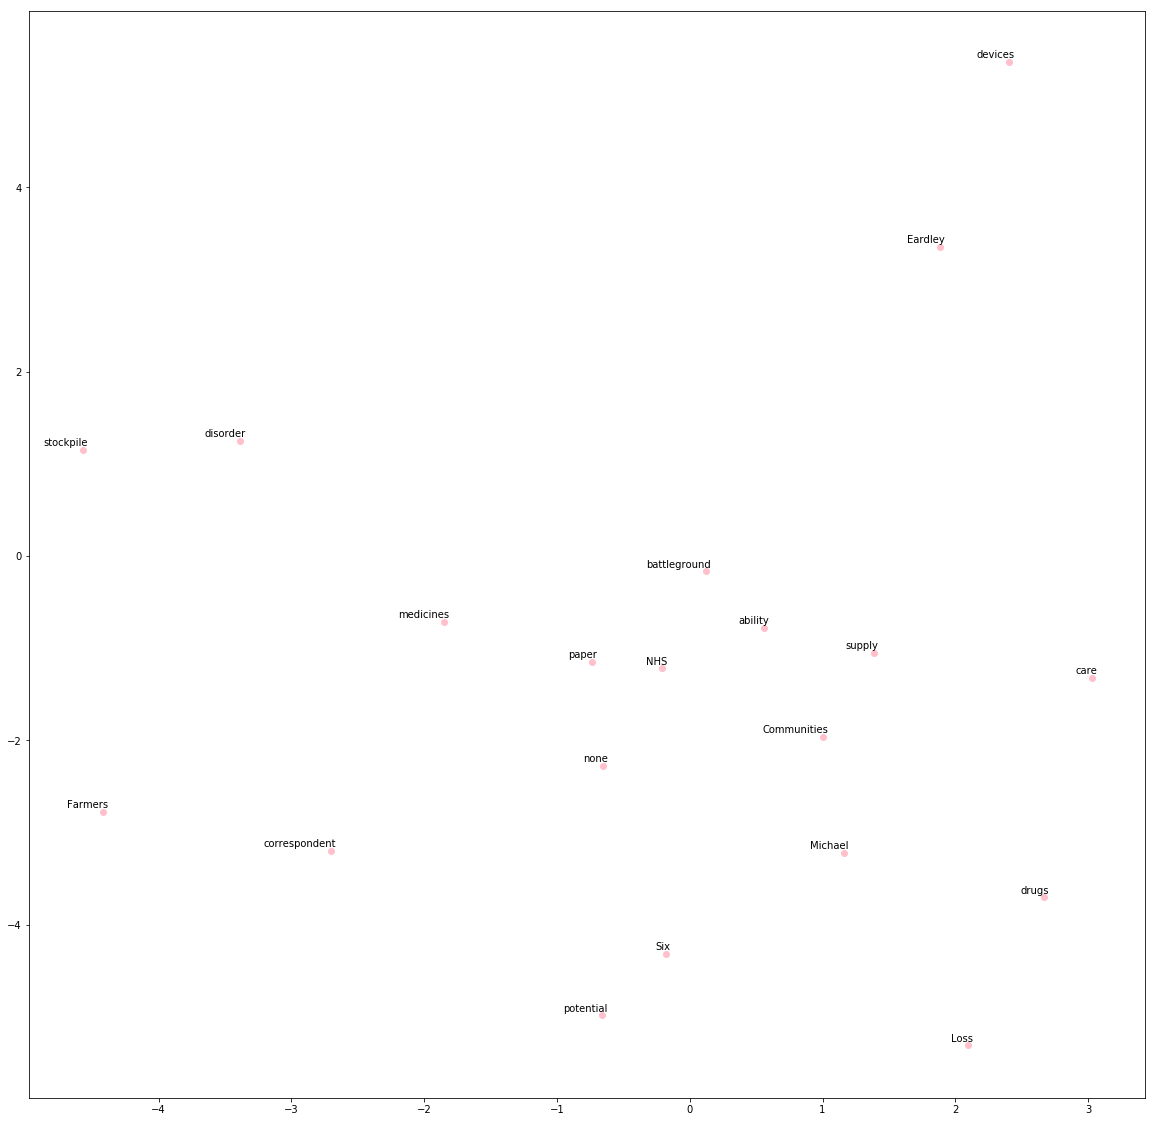

In [16]:

numberOfWords = 20
wordInfo = []

for topicIndex in range (2, 3):
    word2vecProcessor.setTopicFilter(topicIndex)
    wordInfo += word2vecProcessor.getPoints(numberOfWords)
    
processedWords = []
removeWords = ['support', 'peopl', 'govern', 'brexit', 'north']
for word in wordInfo:
    print('x:', word['x'], 'y: ', word['y'], ' --- ', word['stemmed_word'])
    if word['stemmed_word'] not in removeWords:
        processedWords.append(word)
        
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

